# 1. train 데이터 불러오기

##### 1-1) 코랩에 파일 업로드

In [337]:
from google.colab import files
myfile=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


##### 1-2) 코랩에서 train데이터 불러오기

In [338]:
import io
import pandas as pd
train_data = pd.read_csv(io.BytesIO(myfile['train.csv']))
# 데이터 확인
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 2. 데이터 정보 파악


##### 2-1) 데이터 타입 확인

In [339]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


##### 2-2) 데이터 결측값 확인

In [340]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

##### 2-3) 시간 데이터 세분화

In [341]:
dt = pd.DatetimeIndex(train_data["datetime"])
train_data['year'] = dt.year
train_data['month'] = dt.month
train_data['day'] = dt.day
train_data['hour'] = dt.hour
train_data['minute'] = dt.minute
train_data['second'] = dt.second
train_data['dow'] = dt.dayofweek
# 데이터 확인("year","month", ~ , "dow" 열추가)
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


# 3. 데이터 시각화

##### 3-1) 시간 변수간 대여량 확인

In [342]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<Axes: xlabel='dow', ylabel='count'>

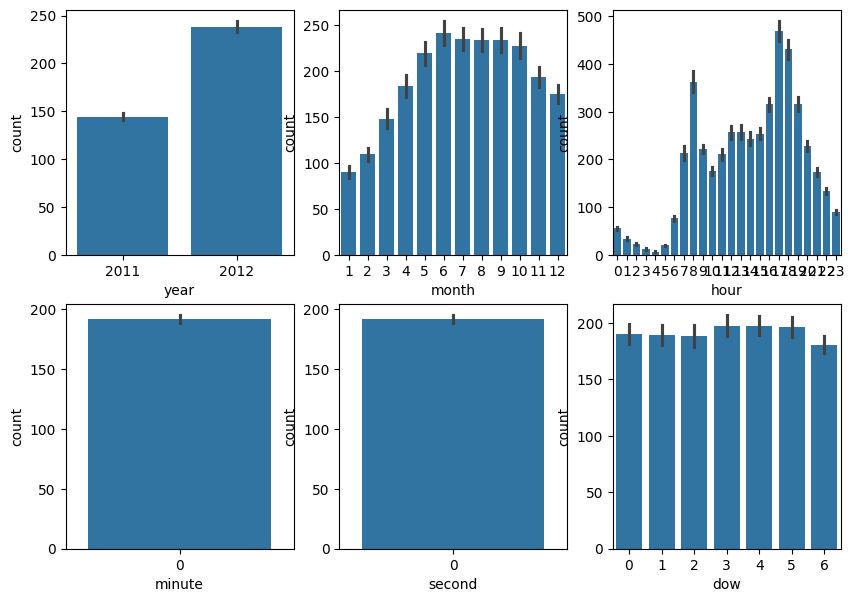

In [343]:
f, axs = plt.subplots(2,3, figsize=(10,7) )
sns.barplot(x="year", y="count",data=train_data, ax=axs[0,0])
sns.barplot(x="month", y="count",data=train_data, ax=axs[0,1])
sns.barplot(x="hour", y="count",data=train_data, ax=axs[0,2])
sns.barplot(x="minute", y="count",data=train_data, ax=axs[1,0])
sns.barplot(x="second", y="count",data=train_data, ax=axs[1,1])
sns.barplot(x="dow", y="count",data=train_data, ax=axs[1,2])

*   막대그래프를 통해 변수 중요도 확인
*   변수 day는 train데이터에서 1-20일, test에서 20-31일 이므로 앞으로 고려하지 않음
*   변수 minute, second는 value가 모두 0이므로 앞으로 고려하지 않을 것



##### 3-2-1) 이산형 변수의 대여량 확인

<Axes: xlabel='weather', ylabel='count'>

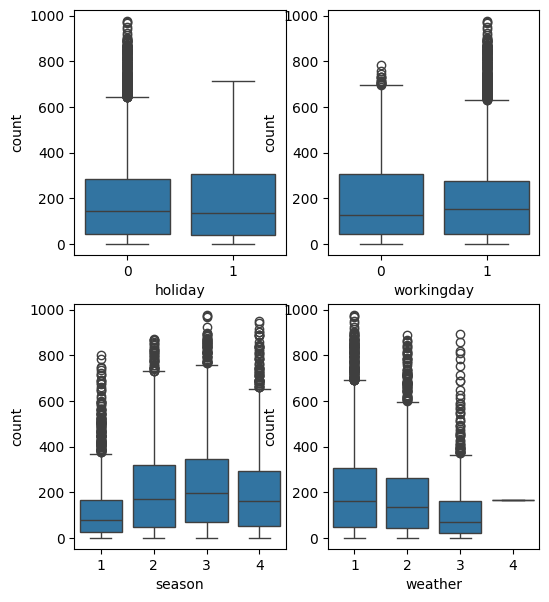

In [344]:
f, axs = plt.subplots(2,2, figsize=(6,7) )
sns.boxplot(x="holiday", y="count",data=train_data, ax=axs[0,0])
sns.boxplot(x="workingday", y="count",data=train_data, ax=axs[0,1])
sns.boxplot(x="season", y="count",data=train_data, ax=axs[1,0])
sns.boxplot(x="weather", y="count",data=train_data, ax=axs[1,1])

<Axes: xlabel='weather', ylabel='count'>

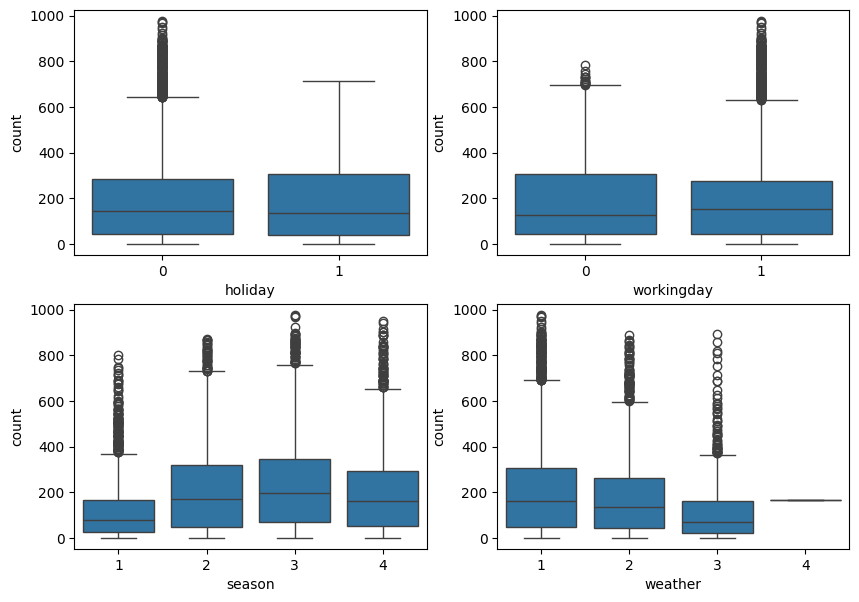

In [345]:
f, axs = plt.subplots(2,2, figsize=(10,7) )
sns.boxplot(x="holiday", y="count",data=train_data, ax=axs[0,0])
sns.boxplot(x="workingday", y="count",data=train_data, ax=axs[0,1])
sns.boxplot(x="season", y="count",data=train_data, ax=axs[1,0])
sns.boxplot(x="weather", y="count",data=train_data, ax=axs[1,1])



*   holiday의 경우 holiday가 아닌(0) 이상값이 많고, 반대로 workingday의 경우는 workingday(1)에 이상값이 많음
*   의외의 경우로 봄(1)에 대여량이 가장 적음
*   weather는 날씨가 좋을수록(1) 대여량이 많음



##### 3-2-2) 이산형 변수의 시간별 대여량 확인

<Axes: xlabel='hour', ylabel='count'>

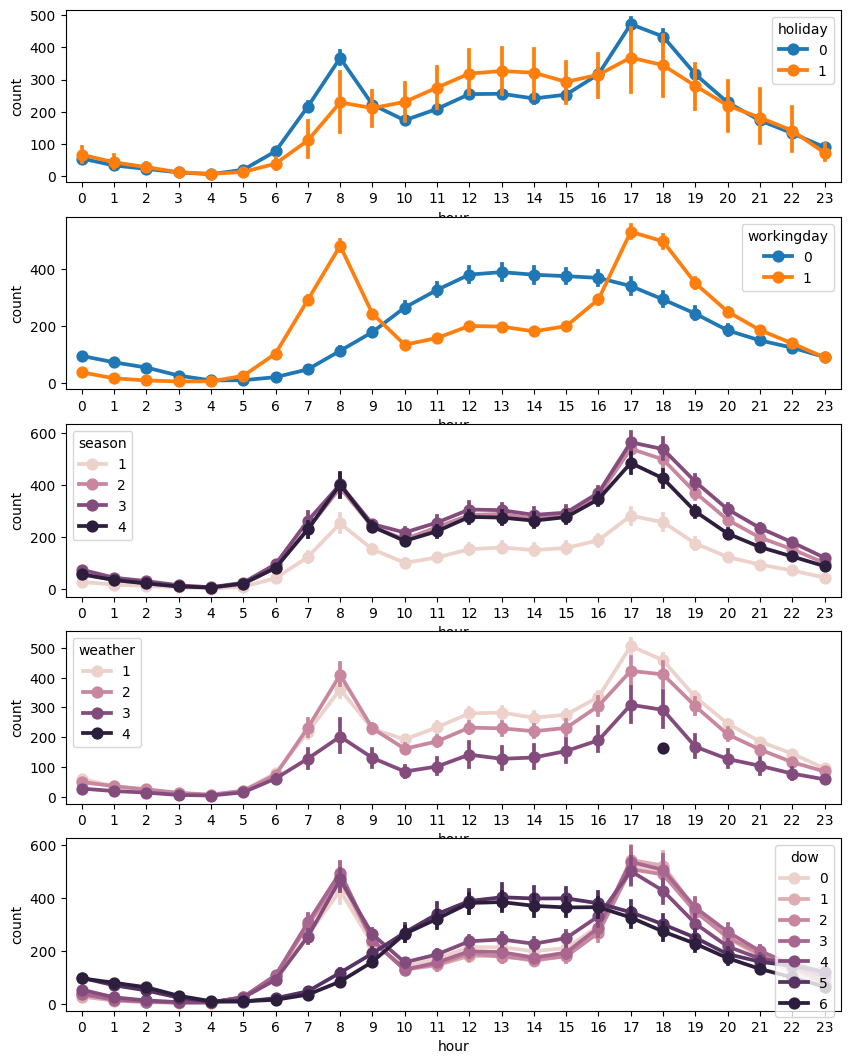

In [346]:
f, axs = plt.subplots(nrows=5, figsize=(10,13) )
sns.pointplot(x="hour", y="count",data=train_data, hue="holiday",ax=axs[0])
sns.pointplot(x="hour", y="count",data=train_data, hue="workingday",ax=axs[1])
sns.pointplot(x="hour", y="count",data=train_data, hue="season",ax=axs[2])
sns.pointplot(x="hour", y="count",data=train_data, hue="weather",ax=axs[3])
sns.pointplot(x="hour", y="count",data=train_data, hue="dow",ax=axs[4])



*   대체적으로 근무일의 근무시간대에 대여량이 증가하였음
*   근무요일이 아닌 경우 오후시간대에 대여량이 높았음
*   weather에서 날씨가 매우 좋지 않음(4)에 이상값이 있음


##### 3-3) 연속형 변수의 대여량 확인

<Axes: xlabel='humidity', ylabel='count'>

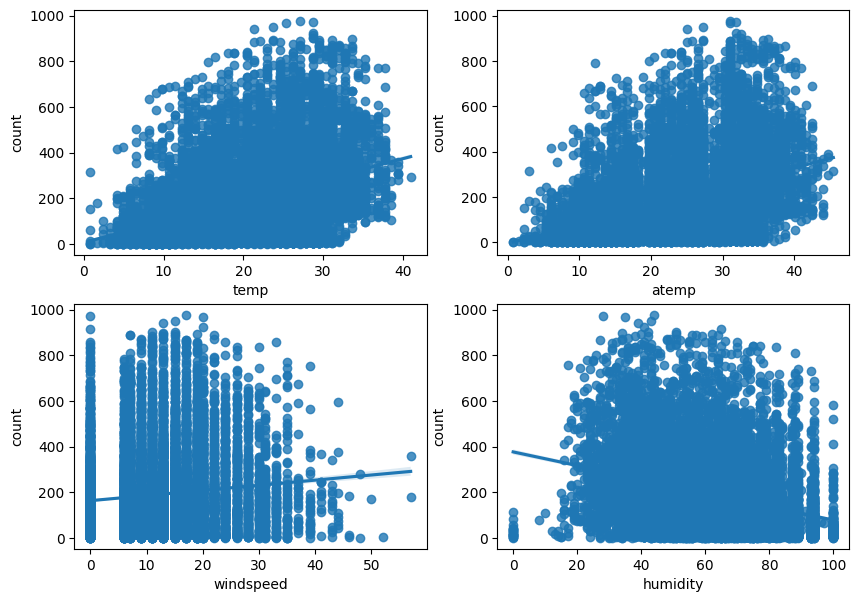

In [347]:
f, axs = plt.subplots(2,2, figsize=(10,7) )
sns.regplot(x="temp", y="count",data=train_data, ax=axs[0,0])
sns.regplot(x="atemp", y="count",data=train_data, ax=axs[0,1])
sns.regplot(x="windspeed", y="count",data=train_data, ax=axs[1,0])
sns.regplot(x="humidity", y="count",data=train_data, ax=axs[1,1])



*   temp와 atemp가 높을수록 대여량이 많음
*   humidity(상대습도)가 낮을수록 대여를 많이 함(0은 이상값으로 추정)
*   windspeed의 경우 풍속이 0인 이상값이 많음
*   풍속이 적을수록 대여량이 적어 보이지만, 풍속자체가 대여량에 큰 관련이 없어보임(이상값등을 고려해 앞으로 고려하지 않을 것)


##### 3-2) 목표변수의 분포도

<ipython-input-348-b845f10c0468>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["count"])


<Axes: xlabel='count', ylabel='Density'>

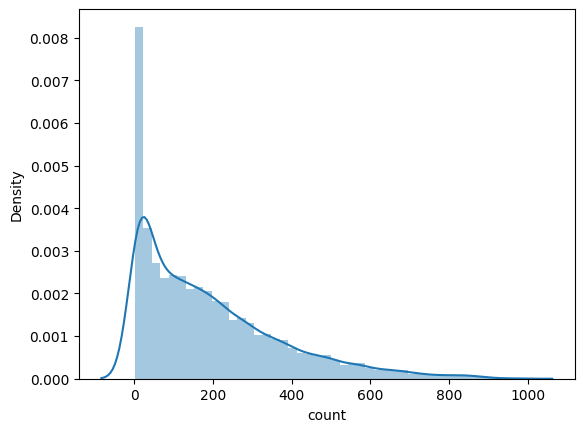

In [348]:
sns.distplot(train_data["count"])



*   오른쪽으로 긴 꼬리를 가진 distribution plot이다
*   편향된 값을 줄이기 위해 로그변환을 시도한다



##### 3-3) 로그변환 된 목표변수의 분포도

<ipython-input-349-be0f8bff5215>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(train_data['count']))


<Axes: xlabel='count', ylabel='Density'>

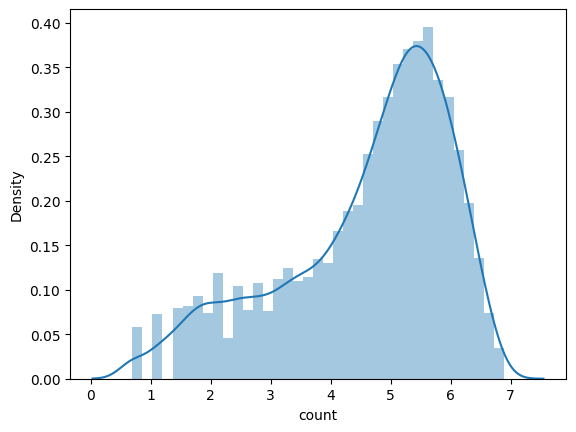

In [349]:
sns.distplot(np.log1p(train_data['count']))



*   로그변환을 통해 편향된 정도를 줄였다
*   로그변환으로 log(1+x)을 사용하여 x가 0일때 -inf을 방지한다



# 4. 모델링 준비

##### 4-1) test데이터 준비

In [350]:
test_data = pd.read_csv(io.BytesIO(myfile['test.csv']))
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


* test데이터의 결측값, 타입 확인

In [351]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


* train_data와 같이 test_data의 시간 세분화

In [352]:
dt = pd.DatetimeIndex(test_data["datetime"])
test_data['year'] = dt.year
test_data['month'] = dt.month
test_data['day'] = dt.day
test_data['hour'] = dt.hour
test_data['minute'] = dt.minute
test_data['second'] = dt.second
test_data['dow'] = dt.dayofweek

print(test_data.head())

              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  minute  second  dow  
0        56    26.0027  2011      1   20     0       0       0    3  
1        56     0.0000  2011      1   20     1       0       0    3  
2        56     0.0000  2011      1   20     2       0       0    3  
3        56    11.0014  2011      1   20     3       0       0    3  
4        56    11.0014  2011      1   20     4       0       0    3  


##### 4-2) 훈련 데이터, 테스트 데이터 할당

In [353]:
x_train = train_data[["year","month","hour","dow","holiday","workingday","season","weather","temp","atemp","humidity"]]
y_train = train_data["count"]
x_test = test_data[["year","month","hour","dow","holiday","workingday","season","weather","temp","atemp","humidity"]]

* 단, *앞선 이유로 변수 day, minute, second 제외 *3-1)
* 목표변수가 count이므로 변수 casual, registered는 제외

##### 4-3) 평가지표: RMSLE 함수 정의

*  대중적인 평가지표 중 RMSE는 MSE에 제곱근을 구하는 것으로, 오류의 제곱을 구하는 MSE보다 작아진다.
*  하지만 타겟값이 큰 데이터들(일부 count value)에 대해서 예측 오류가 잘못 나오면 RMSE도 매우 커지게 된다.
*  따라서 타겟값과 예측값에 로그변환을 하여 RMSE의 단점을 보완한다.



In [354]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 5. 모델링 (RF, GBM)

# 5.1 Random Forest

##### 5.1-1) 모델 생성


*   분류 문제가 아니므로 RandomForestClassifier이 아닌 RandomForestRegressor 모델 사용
*   cpu 사용량을 최대로하여, 트리개수 100개로 인해 작업시간이 길어지는 것을 해결
*   시드: 0



In [355]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)

##### 5.1-2) 모델 학습

In [356]:
log_y_train = np.log1p(y_train)   # 목표변수 로그변환
rf.fit(x_train, log_y_train)      # 모델학습
log_rf_pred = rf.predict(x_train) # 모델검증
rf_pred = np.expm1(log_rf_pred)   # 예측값 지수화

In [357]:
rf_pred

array([ 20.05721207,  30.04349988,  24.64466   , ..., 178.62846844,
       131.45329264,  94.30669482])

##### 5.1-3) 모델 평가

In [358]:
print("RandomForest모델의 RMSLE:",rmsle(y_train,rf_pred))

RandomForest모델의 RMSLE: 0.11115075975195038


##### 5.1-4) 모델 적용을 통해 예측

In [359]:
log_y_pred = rf.predict(x_test) # 모델 적용
y_pred = np.expm1(log_y_pred)   # 예측값 지수화

##### 5.1-5) 예측값에 datetime을 추가한 df 생성

In [360]:
test_data["count"] = y_pred.round()
submission_rf = test_data[["datetime", "count"]]
submission_rf

,datetime,count
0,2011-01-20 00:00:00,12.0
1,2011-01-20 01:00:00,5.0
2,2011-01-20 02:00:00,3.0
3,2011-01-20 03:00:00,4.0
4,2011-01-20 04:00:00,3.0
...,...,...
6488,2012-12-31 19:00:00,276.0
6489,2012-12-31 20:00:00,202.0
6490,2012-12-31 21:00:00,139.0
6491,2012-12-31 22:00:00,111.0


##### 5.1-6) 변수중요도

In [361]:
from sklearn.inspection import permutation_importance

In [362]:
importance = permutation_importance(rf, x_test, log_y_pred, n_repeats=10, random_state=0)
for i, imp in enumerate(importance.importances_mean):
  print(x_train.columns[i], imp)

year 0.07873249505630532
month 0.041521978391226455
hour 1.6406646513168635
dow 0.057919814850534546
holiday 0.00036878216064009097
workingday 0.08538663070177938
season 0.003753077468183863
weather 0.016545128780419915
temp 0.036222513249599055
atemp 0.009322578491309819
humidity 0.025083875802438437


##### 5.1-7) 변수중요도 시각화

<Axes: xlabel='0', ylabel='None'>

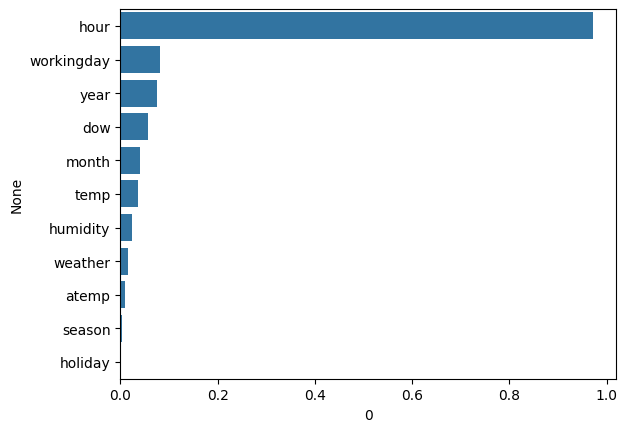

In [363]:
sort_imp = importance.importances_mean.argsort()
df_imp = pd.DataFrame(importance.importances_mean[sort_imp], index=x_train.columns[sort_imp]).sort_values(0, ascending=False)
sns.barplot(x=np.log1p(df_imp[0]), y=df_imp.index, data=df_imp)

# 5.2 GradientBoosting


##### 5.2-1) 모델 생성

In [364]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=0, max_depth=5)

##### 5.2-2) 모델 학습

In [365]:
log_y_train = np.log1p(y_train)   # 목표변수 로그변환
gb.fit(x_train, log_y_train)      # 모델학습
log_gb_pred = gb.predict(x_train) # 모델검증
gb_pred = np.expm1(log_gb_pred)   # 예측값 지수화

##### 5.2-3) 모델 평가

In [366]:
print("GBM모델의 RMSLE:",rmsle(y_train,gb_pred))

GBM모델의 RMSLE: 0.2616686846141723


In [367]:
gb_pred.round()

array([ 25.,  21.,  16., ..., 177., 156.,  92.])

##### 5.2-4) 모델 적용을 통해 예측

In [368]:
log_y_pred = gb.predict(x_test) # 모델 적용
y_pred = np.expm1(log_y_pred)   # 예측값 지수화

##### 5.2-5) 예측값에 datetime을 추가한 df 생성

In [369]:
test_data["count"] = y_pred.round()
submission_gb = test_data[["datetime", "count"]]
submission_gb

,datetime,count
0,2011-01-20 00:00:00,9.0
1,2011-01-20 01:00:00,4.0
2,2011-01-20 02:00:00,3.0
3,2011-01-20 03:00:00,2.0
4,2011-01-20 04:00:00,2.0
...,...,...
6488,2012-12-31 19:00:00,262.0
6489,2012-12-31 20:00:00,201.0
6490,2012-12-31 21:00:00,145.0
6491,2012-12-31 22:00:00,98.0


##### 5.2-6) 변수중요도

In [370]:
importance = permutation_importance(gb, x_test, log_y_pred, n_repeats=10, random_state=0)
for i, imp in enumerate(importance.importances_mean):
  print(x_train.columns[i], imp)

year 0.06870422201912074
month 0.04519294300148513
hour 1.6424145535886274
dow 0.051476386349744455
holiday 0.00022183634494752358
workingday 0.07757330764302608
season 0.00267775441325796
weather 0.01670700449774849
temp 0.03185798066024882
atemp 0.006784120109568359
humidity 0.017740433887078487


<Axes: xlabel='0', ylabel='None'>

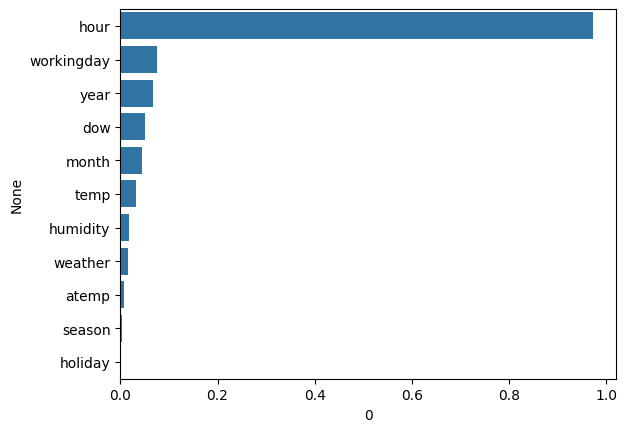

In [371]:
sort_imp = importance.importances_mean.argsort()
df_imp = pd.DataFrame(importance.importances_mean[sort_imp], index=x_train.columns[sort_imp]).sort_values(0, ascending=False)
sns.barplot(x=np.log1p(df_imp[0]), y=df_imp.index, data=df_imp)

# 6. output sbubmission
* RMSLE를 보았을 때 RF가 GBM보다 좋은 성능을 보였다

In [372]:
submission = submission_rf
submission.to_csv('submission.csv')